In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import glob
import richardsplot
%matplotlib inline

### Metric Definition

#### Shift:
The Euclidian distance (in log space) between the centroid of best-fit parameters cloud and the input for simulations, where the location of the centroid is defined as the mean of 49th and 51th pecentile along the semi-major and semi-minor axies.

#### Width:
2-$\sigma$ width along the semi-major axis of the cloud.

### Code to generate these two metrics:

In [17]:
# Import fitting data
fname = '/home/drive/Cadence Data/Fit/drw_roll_m2045/c10_fit_158.49_0.22_32_m2045.hdf5'
file = h5py.File(fname, 'r')
fit = file['fit'][:]

In [22]:
# get the input parameter
lnTauIn = np.log10(fit[0]['tauIn'])
lnSFIn = np.log10(fit[0]['sigmaIn']) + np.log10(np.sqrt(2))

# define the location of the centroid
lnTauCent = np.mean(np.percentile(np.log10(fit['tau']), [49,51]))
lnSFCent = np.mean(np.percentile(np.log10(fit['sigma']), [49,51])) + np.log10(np.sqrt(2))

# find the shift between the centroid and the input
shift = np.sqrt((lnTauCent-lnTauIn)**2 + (lnSFCent-lnSFIn)**2)

# shift clouds to origin, preparing for rotation
lnTau = np.log10(fit['tau'])
lnSF = np.log10(fit['sigma'])+ np.log10(np.sqrt(2))
newTau = lnTau - lnTauCent
newSF = lnSF - lnSFCent

# find the angle with respect to the x axis (log SF)
tau_per = np.percentile(lnTau, [5,95])
sf_per = np.percentile(lnSF, [5,95])
tan = (sf_per[1]-sf_per[0])/(sf_per[1]-sf_per[0])
tan_ang = np.arctan(tan)

# rotating to make cloud horizontal
a = np.cos(tan_ang)
b = np.sin(tan_ang)
c = -b
d = a

# 2 sigma interval as width
rotX_p = np.percentile(a*(newSF)+b*newTau, [2.5,97.5])
width = rotX_p[1]-rotX_p[0]

# print the result
print ('The shift from the input is {}. \nThe scatter (width) is {}.'.format(shift, width))

The shift from the input is 0.13164507150218793. 
The scatter (width) is 0.576098316474638.


### The data, input and centroid locations are also shown in the following plot

/home/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


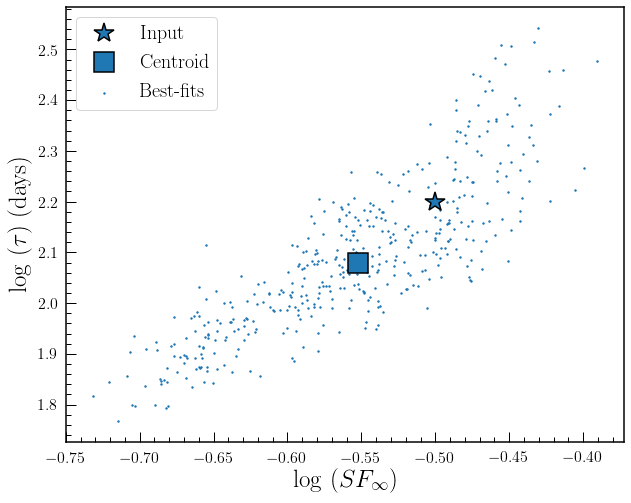

In [33]:
fig = plt.figure(figsize=(10,8))
d = plt.scatter(np.log10(fit['sigma']*np.sqrt(2)), np.log10(fit['tau']), s=2, label='Best-fits')
_ = plt.plot(np.log10(fit['sigmaIn'][0]*np.sqrt(2.0)), np.log10(fit['tauIn'][0]),'*', markersize=20, \
                 zorder=30, markeredgecolor='black', markeredgewidth=1.5, c=d.get_facecolor()[0], label='Input')
_ = plt.plot(lnSFCent, lnTauCent,'s', markersize=20, \
                 zorder=30, markeredgecolor='black', markeredgewidth=1.5, c=d.get_facecolor()[0], label='Centroid')
plt.xlabel('log ($SF_{\infty}$)', fontsize=25)
plt.ylabel('log ($\\tau$) (days)', fontsize=25)
plt.legend(fontsize=20)